In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mid_salaty = pd.read_csv("mid_salary.csv")[["year", "mid salary, hryvnias"]]
population = pd.read_csv("population.csv")[["year", "population (thousands)"]]
fertility_rate = pd.read_csv("fertility_rate.csv")[["year", "fertility rate"]]

In [3]:
mid_salaty.head()

,year,"mid salary, hryvnias"
0,1996,125.23
1,1997,143.09
2,1998,152.83
3,1999,177.39
4,2000,231.04


In [4]:
population.head()

,year,population (thousands)
0,1996,51297.1
1,1997,50818.4
2,1998,50370.8
3,1999,49918.1
4,2000,49429.8


In [5]:
fertility_rate.head()

,year,fertility rate
0,1996,1.36
1,1997,1.27
2,1998,1.21
3,1999,1.13
4,2000,1.12


Single time series prediction models

In [23]:
salaries = mid_salaty["mid salary, hryvnias"].to_list()
n = len(salaries)
populations = population["population (thousands)"].to_list()
m = len(populations)
fertility_rates = fertility_rate["fertility rate"].to_list()
l = len(fertility_rates)

salary_X = pd.DataFrame([ [salaries[i], salaries[i+1], salaries[i+2]] for i in range(n-3) ])
salary_y = pd.Series(salaries[3:])
population_X = pd.DataFrame([ [populations[i], populations[i+1], populations[i+2]] for i in range(m-3) ])
population_y = pd.Series(populations[3:])
fertility_rate_X = pd.DataFrame([ [fertility_rates[i], fertility_rates[i+1], fertility_rates[i+2]] for i in range(l-3) ])
fertility_rate_y = pd.Series(fertility_rates[3:])

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

For salary

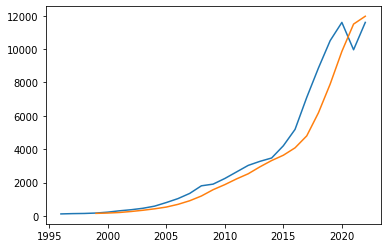

In [8]:
mlp_salary_model = MLPRegressor((25, 75, 100, 50, 25, 100, 25), activation="relu").fit(salary_X, salary_y)
pred = mlp_salary_model.predict(salary_X)

plt.plot(mid_salaty["year"], mid_salaty["mid salary, hryvnias"])
plt.plot(mid_salaty["year"].to_list()[3:], pred)
plt.show()

For population

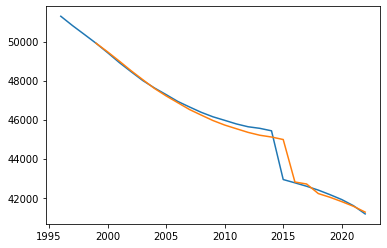

In [25]:
lr_population_model = LinearRegression().fit(population_X, population_y)
pred = lr_population_model.predict(population_X)

plt.plot(population["year"], population["population (thousands)"])
plt.plot(population["year"].to_list()[3:], pred)
plt.show()

For fertility rate

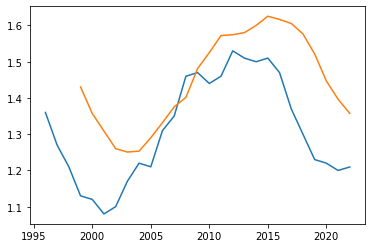

In [31]:
lr_fertility_rate_model = MLPRegressor().fit(fertility_rate_X, fertility_rate_y)
pred = lr_fertility_rate_model.predict(fertility_rate_X).tolist()

plt.plot(fertility_rate["year"], fertility_rate["fertility rate"])
plt.plot(fertility_rate["year"].to_list()[3:], pred)
plt.show()

Training of prediction model.

In [32]:
X = pd.DataFrame([ [salaries[i], salaries[i+1], salaries[i+2], populations[i], populations[i+1], populations[i+2], fertility_rates[i], fertility_rates[i+1], fertility_rates[i+2]] for i in range(n-3) ])
y = pd.Series(pd.read_csv("population.csv")["population (thousands)"].to_list()[3:])

In [33]:
X

,0,1,2,3,4,5,6,7,8
0,125.23,143.09,152.83,51297.1,50818.4,50370.8,1.36,1.27,1.21
1,143.09,152.83,177.39,50818.4,50370.8,49918.1,1.27,1.21,1.13
2,152.83,177.39,231.04,50370.8,49918.1,49429.8,1.21,1.13,1.12
3,177.39,231.04,311.62,49918.1,49429.8,48923.2,1.13,1.12,1.08
4,231.04,311.62,375.98,49429.8,48923.2,48457.1,1.12,1.08,1.10
5,311.62,375.98,462.58,48923.2,48457.1,48003.5,1.08,1.10,1.17
6,375.98,462.58,590.53,48457.1,48003.5,47622.4,1.10,1.17,1.22
7,462.58,590.53,806.14,48003.5,47622.4,47280.8,1.17,1.22,1.21
8,590.53,806.14,1042.88,47622.4,47280.8,46929.5,1.22,1.21,1.31
9,806.14,1042.88,1352.75,47280.8,46929.5,46646.0,1.21,1.31,1.35


In [34]:
y

0     49918.1
1     49429.8
2     48923.2
3     48457.1
4     48003.5
5     47622.4
6     47280.8
7     46929.5
8     46646.0
9     46372.7
10    46143.7
11    45962.9
12    45778.5
13    45633.6
14    45553.0
15    45426.2
16    42928.9
17    42760.5
18    42584.5
19    42386.4
20    42153.2
21    41902.4
22    41588.4
23    41167.3
dtype: float64

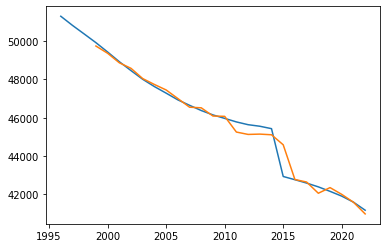

In [37]:
lr_model = LinearRegression().fit(X, y)
pred = lr_model.predict(X)

plt.plot(population["year"], population["population (thousands)"])
plt.plot(population["year"].to_list()[3:], pred)
plt.show()

Data preparation before drediction.

Salary part

In [15]:
saved_salary_pred_X = [ salary_X.loc[[23]] ]
pred_salary = []
saved_salary_pred_X[-1]
#saved_salary_pred_X[-1].index.to_list()[-1]

,0,1,2
23,10503.75,11596.6,9958.22


In [16]:
for i in range(4):
    pred_salary.append( mlp_salary_model.predict(saved_salary_pred_X[-1])[0] )
    index = 23 if not i else 0
    to_save = [ saved_salary_pred_X[-1].loc[index].to_list()[1:] + [mlp_salary_model.predict(saved_salary_pred_X[-1])[0]] ]
    saved_salary_pred_X.append(pd.DataFrame(to_save))
    
pred_salary

[11966.10652977638, 12531.244866729618, 12785.546515298849, 13895.544324790166]

Population part

In [17]:
saved_population_pred_X = [ population_X.loc[[23]] ]
pred_population = []
saved_population_pred_X[-1]

,0,1,2
23,42153.2,41902.4,41588.4


In [18]:
for i in range(4):
    pred_population.append( lr_population_model.predict(saved_population_pred_X[-1])[0] )
    index = 23 if not i else 0
    to_save = [ saved_population_pred_X[-1].loc[index].to_list()[1:] + [lr_population_model.predict(saved_population_pred_X[-1])[0]] ]
    saved_population_pred_X.append(pd.DataFrame(to_save))
pred_population

[43385.49945844108, 44096.320488712685, 44926.56645453331, 45990.67163117838]

Fertility rate part

In [41]:
saved_fertility_rate_pred_X = [ fertility_rate_X.loc[[23]] ]
pred_fertility_rate = []
saved_fertility_rate_pred_X[-1]

,0,1,2
23,1.23,1.22,1.2


In [42]:
for i in range(4):
    pred_fertility_rate.append( lr_fertility_rate_model.predict(saved_fertility_rate_pred_X[-1])[0] )
    index = 23 if not i else 0
    to_save = [ saved_fertility_rate_pred_X[-1].loc[index].to_list()[1:] + [lr_fertility_rate_model.predict(saved_fertility_rate_pred_X[-1])[0]] ]
    saved_fertility_rate_pred_X.append(pd.DataFrame(to_save))
pred_fertility_rate

[1.3573813940915473, 1.3839393699711806, 1.4143524241171228, 1.500339024848187]

Prediction

In [45]:
pred_X = []
for i in range(5):
    index = 0 if i else 23
    pred_X.append( saved_salary_pred_X[i].loc[index].to_list() + saved_population_pred_X[i].loc[index].to_list() + saved_fertility_rate_pred_X[i].loc[index].to_list() )
pred_X = pd.DataFrame(pred_X)
pred_X

,0,1,2,3,4,5,6,7,8
0,10503.750000,11596.600000,9958.220000,42153.200000,41902.400000,41588.400000,1.230000,1.220000,1.200000
1,11596.600000,9958.220000,11966.106530,41902.400000,41588.400000,43385.499458,1.220000,1.200000,1.357381
2,9958.220000,11966.106530,12531.244867,41588.400000,43385.499458,44096.320489,1.200000,1.357381,1.383939
3,11966.106530,12531.244867,12785.546515,43385.499458,44096.320489,44926.566455,1.357381,1.383939,1.414352
4,12531.244867,12785.546515,13895.544325,44096.320489,44926.566455,45990.671631,1.383939,1.414352,1.500339


In [46]:
pred_polulation = lr_model.predict(pred_X)
pred_polulation

array([40973.9887955 , 40071.00593752, 44075.87769818, 43480.60471761,
       44234.87349313])

In [47]:
predicted_population = pd.DataFrame()
predicted_population["year"] = [2023+i for i in range(5)]
predicted_population["population"] = pred_polulation
predicted_population

,year,population
0,2023,40973.988795
1,2024,40071.005938
2,2025,44075.877698
3,2026,43480.604718
4,2027,44234.873493


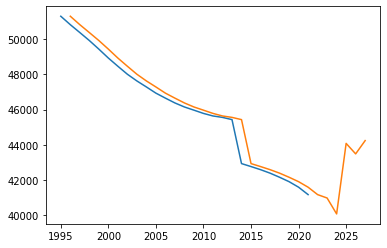

In [51]:
lr_model = LinearRegression().fit(X, y)
pred = lr_model.predict(pred_X)

plt.plot(np.array(population["year"])-np.ones(len(population["year"])), population["population (thousands)"])
plt.plot(population["year"].to_list() + [2023+i for i in range(5)], population["population (thousands)"].to_list() + pred.tolist())
plt.show()

In [22]:
predicted_population.to_csv("predicted_population.csv")